In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
env = UnityEnvironment(file_name="Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [5]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
state_size

37

In [6]:
from dqn_agent import Agent
agent = Agent(state_size= state_size, action_size=action_size, seed=0)

In [7]:
def dqn(n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] 
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

Episode 100	Average Score: 0.58
Episode 200	Average Score: 3.81
Episode 300	Average Score: 7.67
Episode 400	Average Score: 10.72
Episode 500	Average Score: 12.54
Episode 600	Average Score: 14.68
Episode 700	Average Score: 14.70
Episode 800	Average Score: 14.72
Episode 900	Average Score: 15.52
Episode 1000	Average Score: 15.02
Episode 1100	Average Score: 15.90
Episode 1200	Average Score: 15.64
Episode 1300	Average Score: 15.06
Episode 1400	Average Score: 14.95
Episode 1500	Average Score: 15.40
Episode 1600	Average Score: 16.14
Episode 1700	Average Score: 15.28
Episode 1800	Average Score: 15.70
Episode 1900	Average Score: 15.59
Episode 2000	Average Score: 16.11


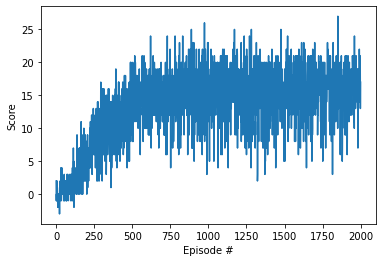

In [26]:


scores = dqn() 

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 6.99
Episode 200	Average Score: 12.70
Episode 300	Average Score: 14.35
Episode 400	Average Score: 14.51
Episode 500	Average Score: 14.59
Episode 600	Average Score: 15.96
Episode 700	Average Score: 15.84
Episode 800	Average Score: 16.28
Episode 900	Average Score: 15.34
Episode 1000	Average Score: 15.36
Episode 1100	Average Score: 15.38
Episode 1200	Average Score: 15.47
Episode 1300	Average Score: 16.19
Episode 1400	Average Score: 15.37
Episode 1500	Average Score: 15.25
Episode 1600	Average Score: 15.53
Episode 1700	Average Score: 14.77
Episode 1800	Average Score: 15.25
Episode 1900	Average Score: 15.67
Episode 2000	Average Score: 15.88


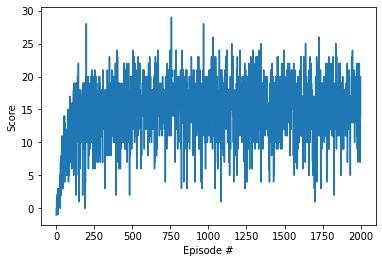

In [27]:
scores = dqn(n_episodes=2000, max_t=1500, eps_start=1.0, eps_end=0.01, eps_decay=0.98) #decay and max_t changed

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
#Observation: Reached faster the score but had a final score a little bit lower

Episode 100	Average Score: 0.55
Episode 200	Average Score: 3.10
Episode 300	Average Score: 7.11
Episode 400	Average Score: 10.15
Episode 500	Average Score: 13.07
Episode 600	Average Score: 14.28
Episode 700	Average Score: 14.63
Episode 800	Average Score: 14.15
Episode 900	Average Score: 14.29
Episode 1000	Average Score: 15.71
Episode 1100	Average Score: 14.69
Episode 1200	Average Score: 15.29
Episode 1300	Average Score: 15.40
Episode 1400	Average Score: 15.23
Episode 1500	Average Score: 15.28
Episode 1600	Average Score: 15.11
Episode 1700	Average Score: 15.00
Episode 1800	Average Score: 14.64
Episode 1900	Average Score: 14.93
Episode 2000	Average Score: 15.60


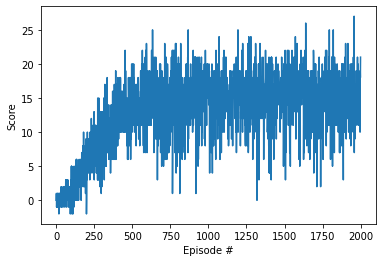

In [8]:
scores = dqn() #Model changes, connected layers had 128 neurons each

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
#Observations: no improvement worth the computational demand

Episode 100	Average Score: 3.79
Episode 200	Average Score: 9.51
Episode 300	Average Score: 12.32
Episode 400	Average Score: 12.85
Episode 500	Average Score: 13.44
Episode 600	Average Score: 14.58
Episode 700	Average Score: 14.54
Episode 800	Average Score: 14.06
Episode 900	Average Score: 15.18
Episode 1000	Average Score: 14.14
Episode 1100	Average Score: 15.57
Episode 1200	Average Score: 14.39
Episode 1300	Average Score: 14.98
Episode 1400	Average Score: 15.01
Episode 1500	Average Score: 14.33
Episode 1600	Average Score: 15.56
Episode 1700	Average Score: 14.65
Episode 1800	Average Score: 14.85
Episode 1900	Average Score: 14.43
Episode 2000	Average Score: 13.69


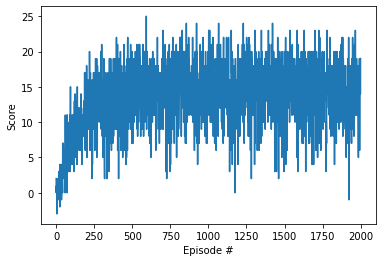

In [9]:
scores = dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.015, eps_decay=0.99) #decay and max_t changed

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 1.68
Episode 200	Average Score: 5.32
Episode 300	Average Score: 7.88
Episode 400	Average Score: 10.66
Episode 500	Average Score: 12.18
Episode 600	Average Score: 13.07
Episode 700	Average Score: 13.77
Episode 800	Average Score: 14.94
Episode 900	Average Score: 14.29
Episode 1000	Average Score: 14.69
Episode 1100	Average Score: 14.91
Episode 1200	Average Score: 15.56
Episode 1300	Average Score: 15.28
Episode 1400	Average Score: 15.36
Episode 1500	Average Score: 15.06
Episode 1600	Average Score: 15.79
Episode 1700	Average Score: 16.03
Episode 1800	Average Score: 14.90
Episode 1900	Average Score: 15.24
Episode 2000	Average Score: 14.70


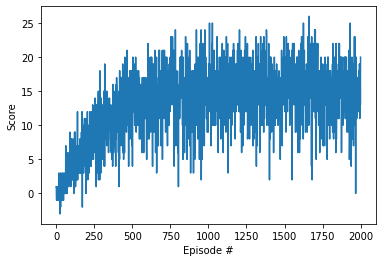

In [11]:
scores = dqn() #Model changes, connected layers had 32 neurons each

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
#Observations: the same results were achieved with a leaner network, 32 neurons on each layer seems like a better option 

In [20]:
env.close()